<a href="https://colab.research.google.com/github/anupammaiti10/Fraud_Detection_DTRF/blob/main/Fraud_Detection_DTRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [ ]:
df=pd.read_csv(f"/content/Fraud.csv")

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This is a really big dataset with no NULL values having size over 534MB

In [ ]:
NonFraud=len(df[df["isFraud"]==0])
Fraud=len(df[df["isFraud"]==1])
perNonFraud=(NonFraud/(NonFraud+Fraud))*100
perFraud=(Fraud/(NonFraud+Fraud))*100
print(f"Non Fraud Transactions: {NonFraud}")
print(f"Fraud Transactions: {Fraud}")
print(f"Percentage of Non Fraud Transactions: {perNonFraud}")
print(f"Percentage of Fraud Transactions: {perFraud}")

Non Fraud Transactions: 6354407
Fraud Transactions: 8213
Percentage of Non Fraud Transactions: 99.87091795518198
Percentage of Fraud Transactions: 0.12908204481801522


These results prove that this is a highly unbalanced data as Percentage of NonFraud transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

In [ ]:
M_df=df[df["nameDest"].str.startswith("M")]

In [ ]:
M_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


There is no information regarding the attribites oldbalanceDest and newbalanceDest.

### VISUALISATION

<Axes: >

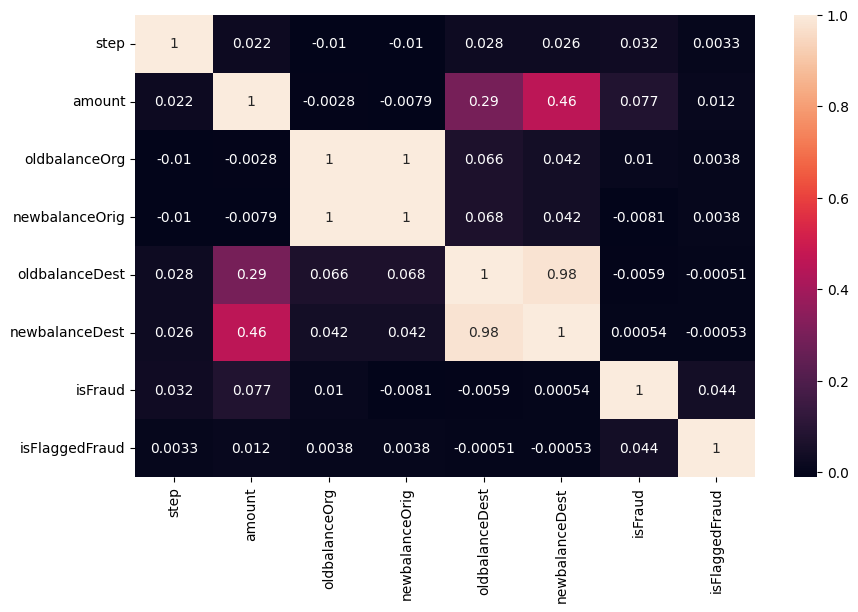

In [ ]:
# CORRELATION HEATMAP
corr = df.drop(['type', 'nameOrig', 'nameDest'], axis=1).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

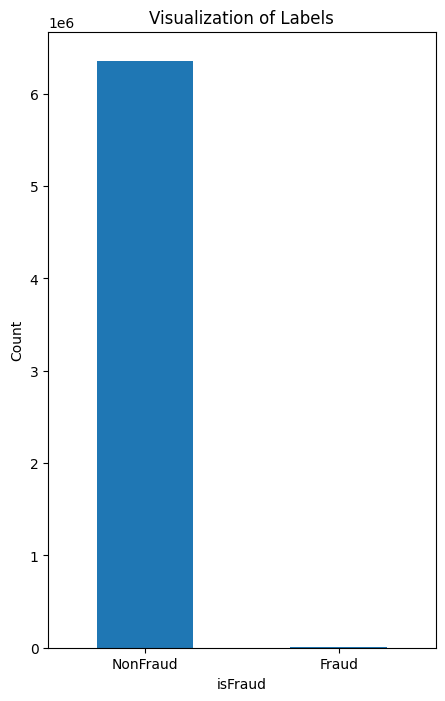

In [ ]:
# Create a plot of bar to show no of both NonFraud and Fraud transactions
plt.figure(figsize=(5,8))
labels = ["NonFraud", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
columns=df.select_dtypes("object").columns
columns.tolist()

['type', 'nameOrig', 'nameDest']

THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY

In [ ]:
# Import LabelEncoder to perform categorical encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in columns:
  df[col]=encoder.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


### MULTICOLINEARITY

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
calc_vif(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [ ]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

,variables,VIF
0,step,2.791609
1,type,4.467405
2,amount,4.149312
3,nameOrig,inf
4,oldbalanceOrg,inf
5,newbalanceOrig,inf
6,nameDest,inf
7,oldbalanceDest,inf
8,newbalanceDest,inf
9,isFraud,1.195305


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,9839.64,0.0,2419963.0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,1864.28,0.0,3922922.0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,181.00,0.0,1441841.0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,181.00,21182.0,6219958.0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,11668.14,0.0,4274900.0


<Axes: >

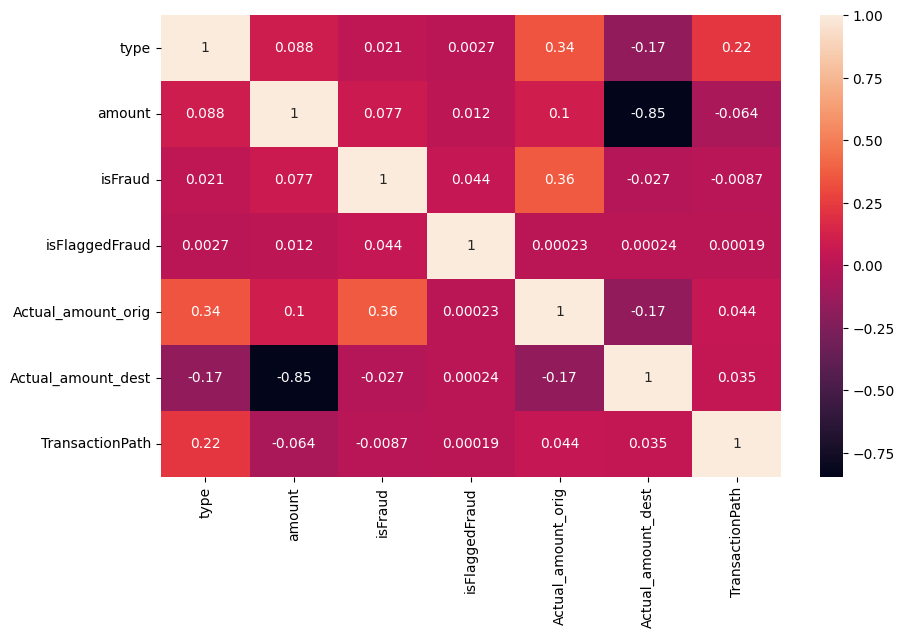

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

How did you select variables to be included in the model?
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

### Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Perform Scaling
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 13)
Shape of X_test:  (1908786, 13)


In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.96709950722605
Random Forest Score:  99.97081914892503


In [ ]:
# confusion matrix of the DecisionTree

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RandomForestTree

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1906050     301]
 [    327    2108]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906303      48]
 [    509    1926]]


TP(Decision Tree) ~ TP(Random Forest) so no competetion here.

FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge

TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too

FN(Decision Tree) ~ FN(Random Forest)

Here Random Forest looks good.

In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.87      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.79      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

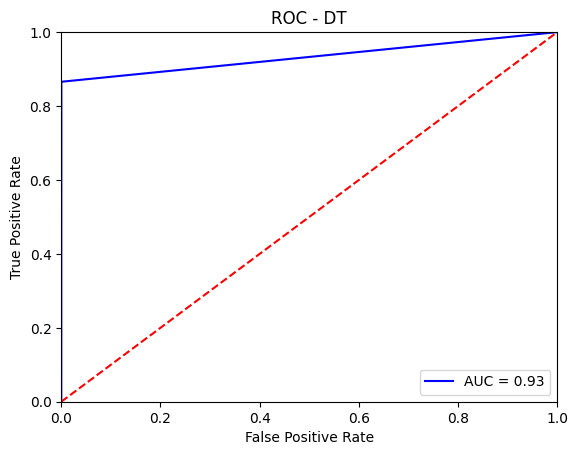

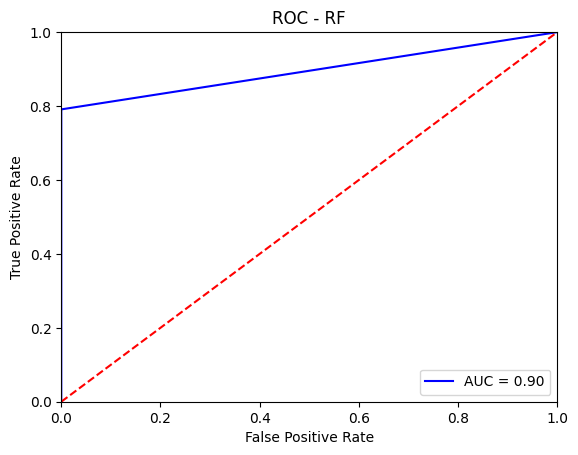

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

### CONCLUSION


### 1. Why Random Forest & Decision Tree Were Chosen

*   **High Precision is Critical:** For fraud detection, it's more important to be sure that a transaction flagged as "fraud" is actually fraudulent (high Precision). This avoids incorrectly blaming legitimate customers (false positives).
*   **They Handle Unbalanced Data Well:** Our dataset is highly unbalanced (99.87% legitimate vs. 0.13% fraud). Random Forest builds multiple decision trees, which helps it learn patterns from the rare fraud cases effectively.
*   **Superior Performance:** While other models (like XGBoost or Logistic Regression) might achieve good overall Accuracy, they often don't match the Precision and Recall needed for this specific problem.

### 2. Key Factors that Predict a Fraudulent Transaction

*   **Transaction Source:** Is the payment request coming from a secured or unsecured website?
*   **Transaction History:** Does the vendor or customer have a history of suspicious activity?
*   **Legitimacy Check:** Is the organization receiving the money known and legitimate?

### 3. What kind of prevention should be adopted while company update its infrastructure?

*   **Use Verified Apps:** Only use official, trusted banking and payment apps.
*   **Look for Secure Websites:** Ensure the website URL begins with https:// and has a lock icon.
*   **Use a VPN:** On public Wi-Fi, always use a Virtual Private Network (VPN).
*   **Update Software:** Keep your phone and computer security software up to date.
*   **Ignore Unsolicited Contact:** Never give out personal or banking details via calls, texts, or emails you didn't initiate.
*   **Act Fast:** If you suspect fraud, contact your bank immediately.

### 4. Assuming these actions have been implemented, how would you determine if they work?
To measure the success of these actions, the company and customers can monitor:

*   **For the Company (Bank):** A decrease in the number of confirmed fraud cases reported by customers.
*   **For the Customer:** Regularly review your bank e-statements and transaction history for any unauthorized activity.